<div style="background-color: #4b3832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
<h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">Analysis Of The sports data 
</h1>
</div>

# Problem Statement-5

In [16]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
#load the data
data = pd.read_csv("Sports Dataset1.csv")
data.head(200)

,ID,Unnamed,Player,Team,Age,Height,Weight,Position,Goals,Assists,...,TacklesWon,CleanSheets,PlayerFatigue,MatchPressure,InjuryHistory,TrainingHours,FatigueInjuryCorrelation,PressurePerformanceImpact,EffectiveTraining,Season
0,1,0,Player C,Team C,31,164.238236,64.899554,Defender,11,2.0,...,22,6,0.374540,55,0,18.390595,1.864902,1.416667,247.074763,2022
1,2,1,Player D,Team C,22,164.489643,55.636159,Defender,2,16.0,...,27,6,0.950714,96,8,15.017219,0.222857,6.666667,216.066045,2019
2,3,2,Player A,Team C,27,188.851650,89.325850,Defender,0,13.0,...,23,5,0.731994,36,8,17.966084,0.000000,8.000000,359.936777,2022
3,4,3,Player C,Team C,29,184.567349,50.952308,Forward,13,1.0,...,3,4,0.598658,37,4,19.347216,0.077487,2.142857,271.347911,2020
4,5,4,Player C,Team C,27,192.172813,78.832881,Defender,6,8.0,...,12,8,0.156019,14,1,6.884615,1.029822,9.857143,112.185952,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,195,Player B,Team A,29,175.925980,61.952819,Goalkeeper,0,16.0,...,5,2,0.349210,86,0,15.015466,2.814531,2.333333,318.430585,2022
196,197,196,Player B,Team A,21,183.198713,52.569559,Midfielder,24,15.0,...,0,2,0.725956,56,1,14.719465,0.573408,2.480000,198.202132,2022
197,198,197,Player D,Team C,30,188.851650,62.990222,Midfielder,0,0.0,...,10,5,0.897110,13,3,17.153727,0.707367,10.625725,487.912194,2022
198,199,198,Player A,Team A,34,188.851650,119.098185,Goalkeeper,0,0.0,...,0,7,0.887086,56,8,7.093319,3.233319,4.743002,193.170877,2021


###  Feature Engineering.
#### Feature engineering is the process of selecting, manipulating and transforming raw data into features that can be used in supervised learning. It consists of few processes: feature creation, transformations, feature extraction and Feature Selection .

### 1. Feature Creation: Create new features

In [18]:
# Feature Engineering: Create new features
data['PerformanceIndex'] = data['Goals'] + data['Assists'] +  data['TacklesWon'] +  data['ShotsOnTarget'] +  data['CleanSheets']
data['GoalScoringEfficiency'] = data['Goals'] / data['ShotsOnTarget']
data.head(200)

,ID,Unnamed,Player,Team,Age,Height,Weight,Position,Goals,Assists,...,PlayerFatigue,MatchPressure,InjuryHistory,TrainingHours,FatigueInjuryCorrelation,PressurePerformanceImpact,EffectiveTraining,Season,PerformanceIndex,GoalScoringEfficiency
0,1,0,Player C,Team C,31,164.238236,64.899554,Defender,11,2.0,...,0.374540,55,0,18.390595,1.864902,1.416667,247.074763,2022,45.0,2.750000
1,2,1,Player D,Team C,22,164.489643,55.636159,Defender,2,16.0,...,0.950714,96,8,15.017219,0.222857,6.666667,216.066045,2019,57.0,0.333333
2,3,2,Player A,Team C,27,188.851650,89.325850,Defender,0,13.0,...,0.731994,36,8,17.966084,0.000000,8.000000,359.936777,2022,47.0,0.000000
3,4,3,Player C,Team C,29,184.567349,50.952308,Forward,13,1.0,...,0.598658,37,4,19.347216,0.077487,2.142857,271.347911,2020,26.0,2.600000
4,5,4,Player C,Team C,27,192.172813,78.832881,Defender,6,8.0,...,0.156019,14,1,6.884615,1.029822,9.857143,112.185952,2022,37.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,195,Player B,Team A,29,175.925980,61.952819,Goalkeeper,0,16.0,...,0.349210,86,0,15.015466,2.814531,2.333333,318.430585,2022,32.0,0.000000
196,197,196,Player B,Team A,21,183.198713,52.569559,Midfielder,24,15.0,...,0.725956,56,1,14.719465,0.573408,2.480000,198.202132,2022,53.0,2.000000
197,198,197,Player D,Team C,30,188.851650,62.990222,Midfielder,0,0.0,...,0.897110,13,3,17.153727,0.707367,10.625725,487.912194,2022,18.0,0.000000
198,199,198,Player A,Team A,34,188.851650,119.098185,Goalkeeper,0,0.0,...,0.887086,56,8,7.093319,3.233319,4.743002,193.170877,2021,17.0,0.000000


In [19]:

# Handle infinite values by replacing them with NaN
data['GoalScoringEfficiency'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle NaN values by replacing them with the mean of the column
data['GoalScoringEfficiency'].fillna(data['GoalScoringEfficiency'].mean(), inplace=True)

#downloading the feature added csv.
try:
    data.to_csv('sports_dataset_new.csv', index=False)
    print("sports_dataset_new.csv created successfully.")
    
except Exception as e:
    print("Could not createsports_dataset_new.csv ")
    print("Error:", e)


sports_dataset_new.csv created successfully.


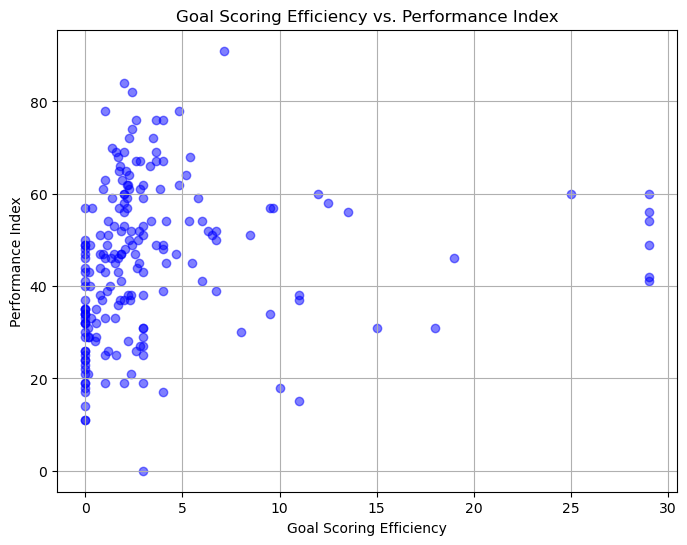

In [20]:
# to understand relationship between a player's goal scoring efficiency and their overall performance index.
top_200_data =data.head(200)
plt.figure(figsize=(8, 6))
plt.scatter(top_200_data['GoalScoringEfficiency'], top_200_data['PerformanceIndex'], color='blue', alpha=0.5)
plt.title('Goal Scoring Efficiency vs. Performance Index')
plt.xlabel('Goal Scoring Efficiency')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

## 2.Transformations of features created.

In [21]:
# using the created deature  'data' is already defined and has the necessary columns.
# Consider only the first 200 records
data_200 = data.head(200)

# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(data_200[['PerformanceIndex', 'GoalScoringEfficiency']])
data_200[['PerformanceIndex_Normalized', 'GoalScoringEfficiency_Normalized']] = normalized_features

# Dimensionality Reduction using PCA
pca = PCA(n_components=1)
data_200['PCA_Feature'] = pca.fit_transform(data_200[['PerformanceIndex_Normalized', 'GoalScoringEfficiency_Normalized']])

print("Transformations Completed:")
print(data_200[['PerformanceIndex_Normalized', 'GoalScoringEfficiency_Normalized', 'PCA_Feature']].head())



Transformations Completed:
   PerformanceIndex_Normalized  GoalScoringEfficiency_Normalized  PCA_Feature
0                     0.494505                          0.094828    -0.026962
1                     0.626374                          0.011494    -0.033821
2                     0.516484                          0.000000    -0.098361
3                     0.285714                          0.089655    -0.135122
4                     0.406593                          0.068966    -0.093062


/var/folders/3d/n6qry7nd10g6p3gqs292vxlc0000gn/T/ipykernel_12107/711278715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_200[['PerformanceIndex_Normalized', 'GoalScoringEfficiency_Normalized']] = normalized_features
/var/folders/3d/n6qry7nd10g6p3gqs292vxlc0000gn/T/ipykernel_12107/711278715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_200[['PerformanceIndex_Normalized', 'GoalScoringEfficiency_Normalized']] = normalized_features
/var/folders/3d/n6qry7nd10g6p3gqs292vxlc0000gn/T/ipykernel

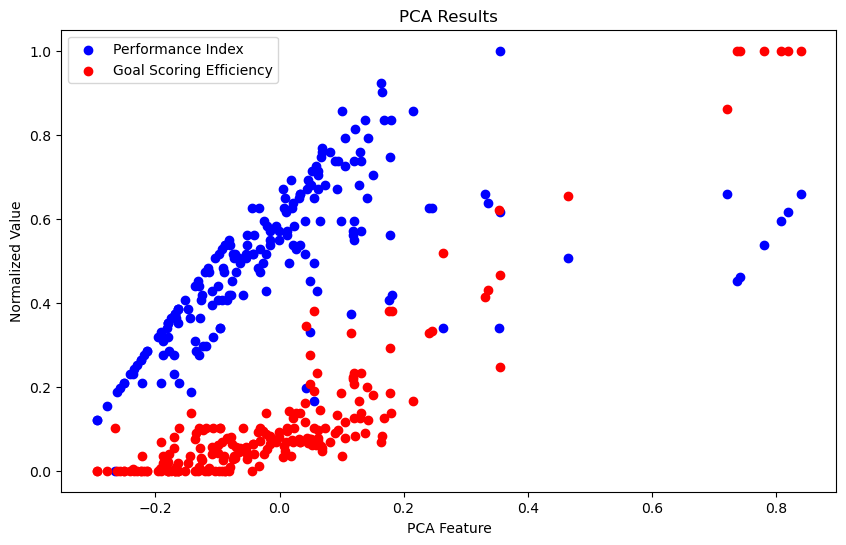

In [22]:
# Scatter plot for PCA results after transformation.

plt.figure(figsize=(10, 6))
plt.scatter(data_200['PCA_Feature'], data_200['PerformanceIndex_Normalized'], c='blue', label='Performance Index')
plt.scatter(data_200['PCA_Feature'], data_200['GoalScoringEfficiency_Normalized'], c='red', label='Goal Scoring Efficiency')
plt.title('PCA Results')
plt.xlabel('PCA Feature')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()


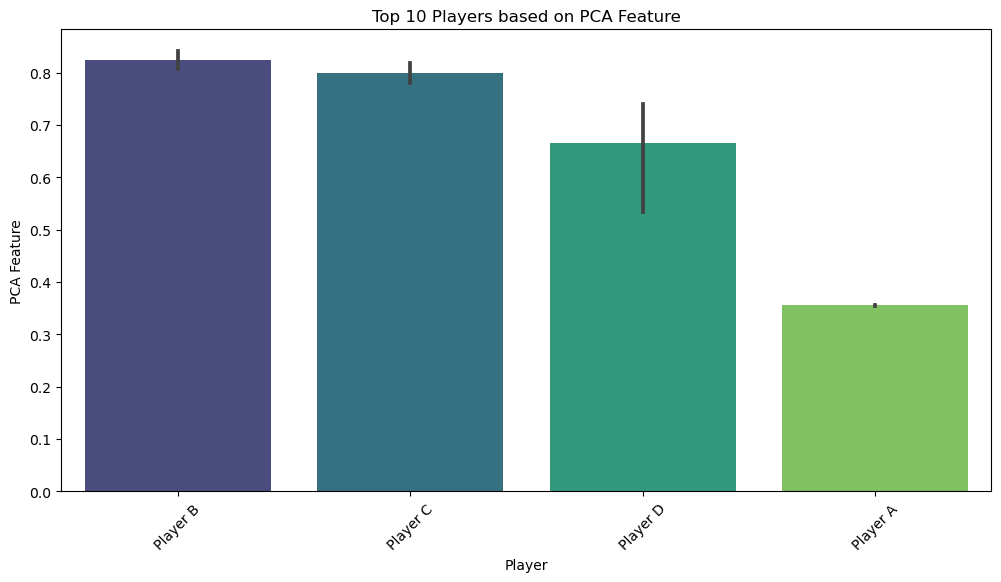

In [23]:
# Bar plot for the top 10 players based on the PCA feature
plt.figure(figsize=(12, 6))

# Sort data based on the PCA feature
data_200_sorted = data_200.sort_values(by='PCA_Feature', ascending=False)
top_n = 10
sns.barplot(x=data_200_sorted['Player'].head(top_n), y=data_200_sorted['PCA_Feature'].head(top_n), palette='viridis')
plt.title('Top 10 Players based on PCA Feature')
plt.xlabel('Player')
plt.ylabel('PCA Feature')
plt.xticks(rotation=45)
plt.show()

###  3.Additional Complexity: machine learning techniques for feature selection and extraction.

In [24]:
# Select numerical features and target variable
target = 'EffectiveTraining'  # Assuming EffectiveTraining is the target variable
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove(target)

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Define features (X) and target (y)
X = data[numerical_features]
y = data[target]


### Feature Selection using RandomForestRegressor

In [25]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [26]:
# Get feature importances and select top features
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': numerical_features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select top 10  features
top_n_features = 10
selected_features = feature_importances.head(top_n_features)['Feature'].tolist()

print("Selected Features based on RandomForest importance:")
print(selected_features)

Selected Features based on RandomForest importance:
['Goals', 'PressurePerformanceImpact', 'Assists', 'DistanceCovered', 'Unnamed', 'PassCompletionRate', 'Height', 'Sprints', 'FatigueInjuryCorrelation', 'Weight']


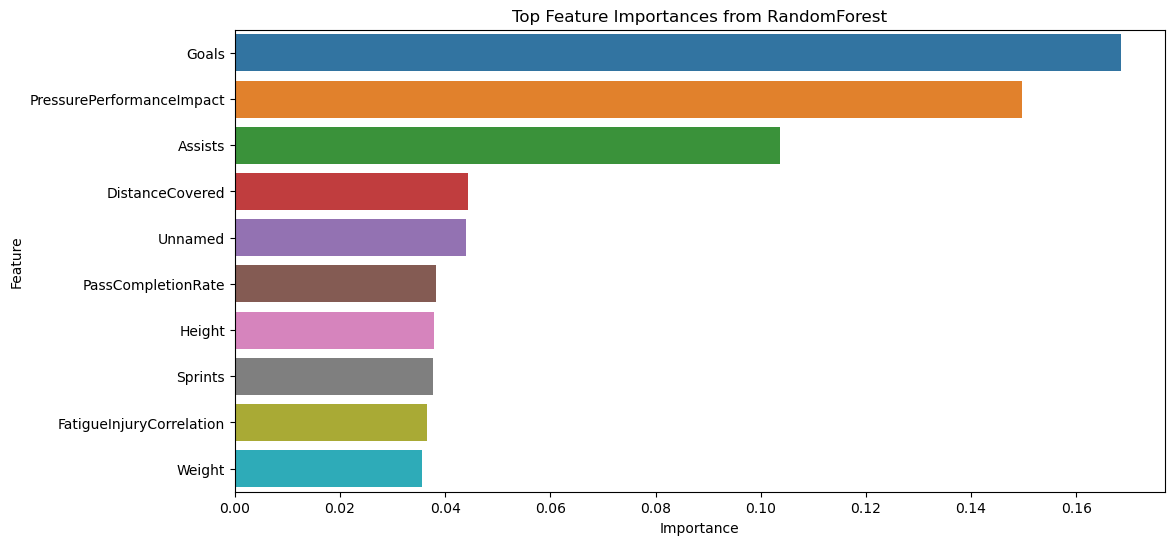

In [27]:
#bar polt to show 10 important feaures in the dataset.
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(top_n_features))
plt.title('Top Feature Importances from RandomForest')
plt.show()


In [28]:
# Standardize the data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[selected_features])

### Feature Extraction using PCA

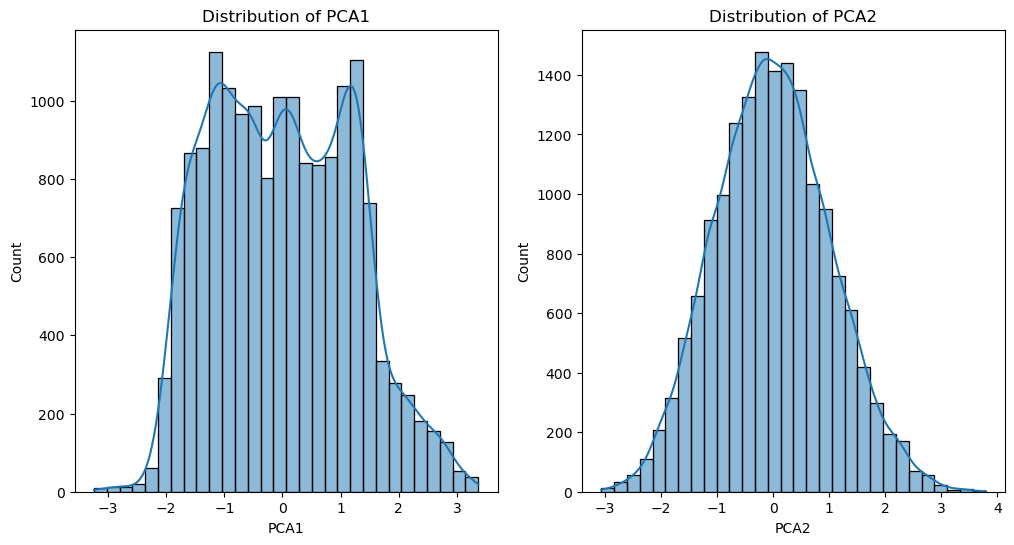

In [29]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df[target] = y.values

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(pca_df['PCA1'], kde=True, bins=30)
plt.title('Distribution of PCA1')
plt.subplot(1, 2, 2)
sns.histplot(pca_df['PCA2'], kde=True, bins=30)
plt.title('Distribution of PCA2')

plt.show()
